In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 32.7 MB/s eta 0:00:00


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
plt.style.use ('dark_background')
import seaborn as sns


In [ ]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project News Detection/WELFake_Dataset.csv');
df.shape

df = df.dropna();
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

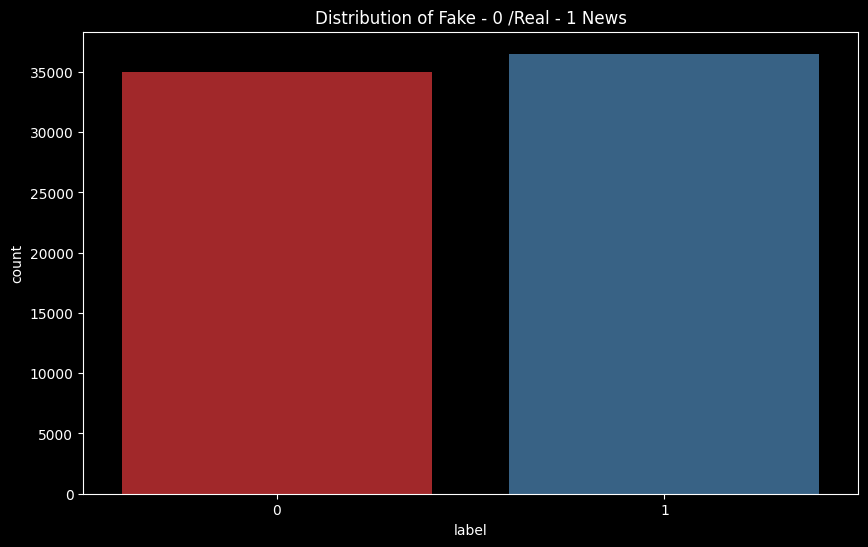

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

Text(0.5, 1.0, 'Distribution of the News Words count')

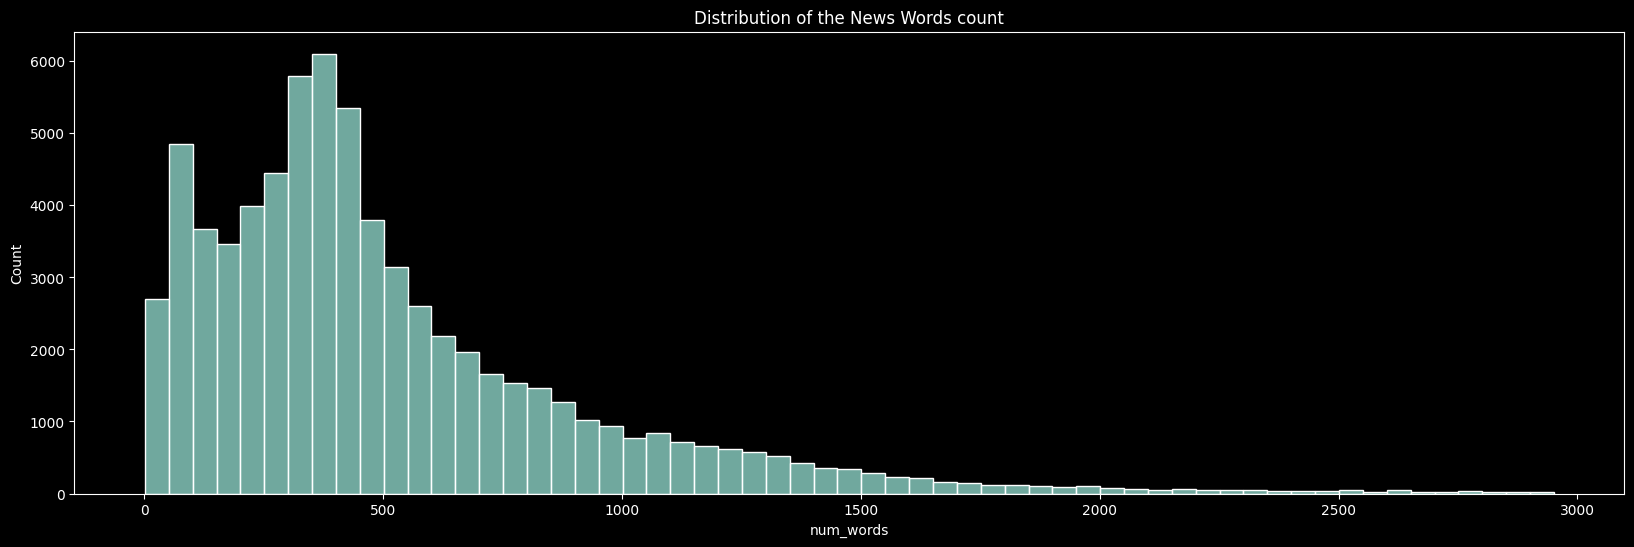

In [ ]:
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

In [ ]:
labels = df.label
labels.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [ ]:
import numpy as np
import re
import collections
import contractions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def remove_tags(string):
    #removelist = ""
    string = re.sub(r"\. \. \.", "\.", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`\.]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    result = re.sub('https://.*','',string)
    return string.strip().lower()
    return result
df['text']= df['text'].apply(lambda cw : remove_tags(cw))
df


,Unnamed: 0,title,text,label,num_words
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1,871
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now , most of the demonstrators gathered last ...",1,34
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0,1321
4,4,SATAN 2: Russia unvelis an image of its terrif...,"the rs 28 sarmat missile , dubbed satan 2 , wi...",1,329
5,5,About Time! Christian Group Sues Amazon and SP...,all we can say on this one is it s about time ...,1,244
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,washington ( reuters ) hackers believed to be ...,0,735
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"you know , because in fantasyland republicans ...",1,604
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse to leave train at refugee camp...,0,477
72132,72132,Trump tussle gives unpopular Mexican leader mu...,mexico city ( reuters ) donald trump s combati...,0,559


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_Special_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-text data
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove email addresses
    text = re.sub(r'http\S+', '', text)    # remove URLs
    text = re.sub(r'\d+', '', text)        # remove numbers

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s\$\%\&\*\@\-\+\=\[\]\{\}\:\;\|\\\\\<\>\?\!\#\~\(\)\.\,\^\/\´\`\¨\ª\º\€\$\£\¥\¢\₹]', '', text)
    text = re.sub(r'_', ' ', text)

    return text


In [ ]:
def clean_stop_text(text):
   # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    text = ' '.join(words)

    return text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["text"] = df["text"].apply(clean_Special_text)

In [ ]:
df["text"] = df["text"].apply(clean_stop_text)
df

,Unnamed: 0,title,text,label,num_words
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,washington ( reuters ) hackers believed workin...,0,735
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"know , fantasyland republicans never questione...",1,604
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,migrants refuse leave train refugee camp hunga...,0,477
72132,72132,Trump tussle gives unpopular Mexican leader mu...,mexico city ( reuters ) donald trump combative...,0,559


In [ ]:
from google.colab import files
df.to_csv('new_eng_bert_output.csv', encoding = 'utf-8-sig') 
files.download('new_eng_bert_output.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project News Detection/new_eng_bert_output.csv');
df.shape

df = df.dropna();
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,num_words
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf fuky...,1,871
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,", demonstrators gathered last night exercising...",1,34
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1321
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs sarmat missile , dubbed satan , replace ss ...",1,329
4,5,5,About Time! Christian Group Sues Amazon and SP...,say one time someone sued southern poverty law...,1,244


In [ ]:
news_articles = df['text'].tolist()
labels = df['label'].tolist()


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, testing, and validation sets
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2

X_train, X_test_val, y_train, y_test_val = train_test_split(df['text'], df['label'], test_size=test_ratio + validation_ratio, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=validation_ratio/(test_ratio + validation_ratio), random_state=42)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_text(text, max_length):
    return tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

max_length = 512
train_encodings = encode_text(X_train.tolist(), max_length)
test_encodings = encode_text(X_test.tolist(), max_length)
val_encodings = encode_text(X_val.tolist(), max_length)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, y_train.tolist())
val_dataset = NewsDataset(val_encodings, y_val.tolist())
test_dataset = NewsDataset(test_encodings, y_test.tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 5
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

import numpy as np

def accuracy(logits, labels):
    predictions = np.argmax(logits, axis=1)
    correct = (predictions == labels).sum()
    total = len(labels)
    return correct / total

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    # Training
    model.train()
    total_train_loss = 0
    total_train_accuracy = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        logits = logits.detach().cpu().numpy()
        label_ids = labels.cpu().numpy()
        total_train_accuracy += accuracy(logits, label_ids)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Validation
    model.eval()
    total_val_loss = 0
    total_val_accuracy = 0

    for batch in val_loader:
        with torch.no_grad():
            outputs = model(batch["input_ids"].to(device), attention_mask=batch["attention_mask"].to(device), labels=batch["labels"].to(device))
            loss, logits = outputs.loss, outputs.logits

        total_val_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = batch["labels"].cpu().numpy()
        total_val_accuracy += accuracy(logits, label_ids)

    avg_val_loss = total_val_loss / len(val_loader)
    avg_val_accuracy = total_val_accuracy / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

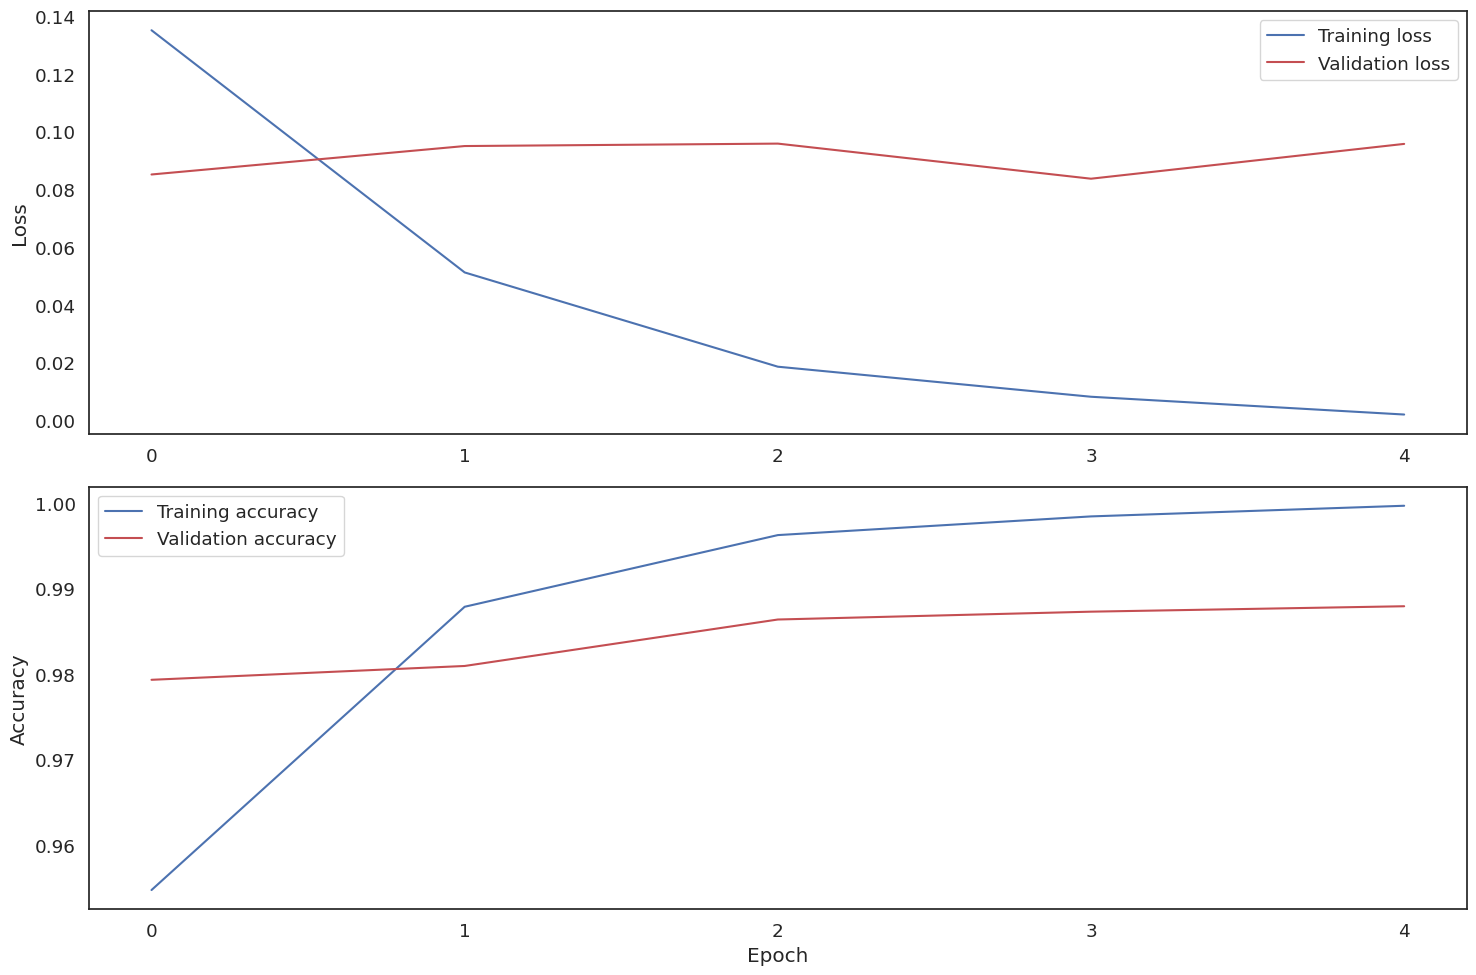

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='white', font_scale=1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.plot(train_losses, color='b', label="Training loss")
ax1.plot(val_losses, color='r', label="Validation loss")
ax1.set_xticks(np.arange(0, epochs, 1))
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(train_accuracies, color='b', label="Training accuracy")
ax2.plot(val_accuracies, color='r', label="Validation accuracy")
ax2.set_xticks(np.arange(0, epochs, 1))
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the lists for storing predictions and true labels
all_logits = []
all_label_ids = []

# Evaluation on the test set
model.eval()

for batch in test_loader:
    with torch.no_grad():
        outputs = model(batch["input_ids"].to(device), attention_mask=batch["attention_mask"].to(device))
        logits = outputs.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = batch["labels"].cpu().numpy()

    # Store predictions and true labels
    all_logits.extend(logits)
    all_label_ids.extend(label_ids)

# Compute the predicted classes
predicted_classes = np.argmax(all_logits, axis=1)

# Calculate the accuracy score and confusion matrix
test_accuracy = accuracy_score(all_label_ids, predicted_classes)
confusion_mat = confusion_matrix(all_label_ids, predicted_classes)

print("Test accuracy:", test_accuracy)
print("Confusion matrix:\n", confusion_mat)


Test accuracy: 0.9885577058906625
Confusion matrix:
 [[6900   69]
 [  93 7096]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(all_label_ids, predicted_classes, target_names=['Fake', 'Real'])
print(report)

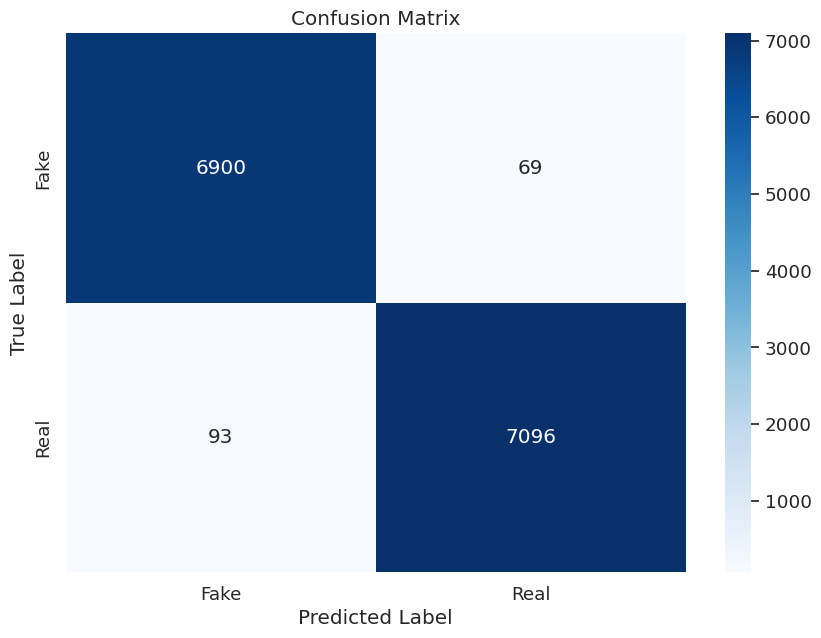

In [ ]:
# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/Project News Detection/model/new_eng_bert_model"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification

# Load the BERT model and tokenizer
model_path = '/content/drive/MyDrive/Project News Detection/model/new_eng_bert_model'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)


# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Input text (News Articles)
news_articles = ["Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.",
                 "president donald trump returned attacks biased media , weekend away washington d. c. fake media ( real media ) gotten even worse since election , wrote twitter . every story badly slanted . hold truth ! last week , media surprised trump referred honorable people event white house . trump appeared watching fox friends monday morning , praising show analysis . first days presidency exposed total failure last eight years foreign policy ! wrote . true .",
                 "tentative deal reached weekend presidential campaigns hillary clinton bernie sanders includes debate thursday university new hampshire durham . msnbc announced sunday host debate , scheduled p.m. eastern chuck todd rachel maddow moderating . new hampshire first nation primary feb. . clinton sanders tight race monday iowa caucuses , clinton trails vermont senator new hampshire , raising possibility democratic front runner could lose first two contests . former maryland gov . martin omalley trailed wide margins . democratic national committee says reached agreement principal party sanction manage debates primary schedule , including new hampshire debate ."
]

max_length = 512

for article in news_articles:
    # Preprocess news article
    input_sequence = tokenizer.encode_plus(article, max_length=max_length, padding='max_length', truncation=True, return_tensors='pt')
    input_ids = input_sequence['input_ids'].to(device)
    attention_mask = input_sequence['attention_mask'].to(device)

    # Set the model to evaluation mode
    model.eval()

    # Make a prediction with the model (without gradients)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted logits and move them back to the CPU
    logits = outputs.logits.detach().cpu().numpy()

    # Convert logits to class probabilities using softmax
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    probability_real = probabilities[0, 1]

    # Interpret the result
    threshold = 0.5
        
    if probability_real >= threshold:
        print(f"The news article:\n\n{article}\n\nis predicted as REAL with a probability of {probability_real:.2f}")
    else:
        print(f"The news article:\n\n{article}\n\nis predicted as FAKE with a probability of {1 - probability_real:.2f}")
    print('-' * 80)


The news article:

Demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change.

is predicted as REAL with a probability of 1.00
--------------------------------------------------------------------------------
The news article:

president donald trump returned attacks biased media , weekend away washington d. c. fake media ( real media ) gotten even worse since election , wrote twitter . every story badly slanted . hold truth ! last week , media surprised trump referred honorable people event white house . trump appeared watching fox friends monday morning , praising show analysis . first days presidency exposed total failure last eight years foreign policy ! wrote . true .

is predicted as FAKE with a probability of 1.00
--------------------------------------------------------------------------------
The news article:

tentative deal reached weekend presidential campaigns hillary clinton bernie sanders includes debate t

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 21 14:31:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |  12505MiB / 15360MiB |     75%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime
